In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\William\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
wind_data = pd.read_excel('src_wings_meteorology_windspeed_snapshot_2023_08_02.xlsx')
alert_data = pd.read_excel('src_wings_meteorology_station_summary_snapshot_2023_08_02.xlsx')
station_data = pd.read_excel('gis_weatherstation_shape_2024_10_04.xlsx')

In [3]:
#task 
#1. merge dfs
#2. find insights about historical wind speed distribution and alert threshold
#3. geospatial visualization
#4. boxplot/hist to show distb between alert threshold and wind speed distribution

In [4]:
wind_data

date  wind_speed station snapshot_date
0     2012-09-14        19.0     AMO    2023-08-02
1     2012-09-15        20.0     AMO    2023-08-02
2     2012-10-14        16.0     AMO    2023-08-02
3     2012-10-26        23.0     AMO    2023-08-02
4     2012-10-27        15.0     AMO    2023-08-02
...          ...         ...     ...           ...
38659 2022-11-24        36.0     YSA    2023-08-02
38660 2022-11-25        36.0     YSA    2023-08-02
38661 2022-12-21        18.0     YSA    2023-08-02
38662 2022-12-24        31.0     YSA    2023-08-02
38663 2022-12-25        26.0     YSA    2023-08-02

[38664 rows x 4 columns]

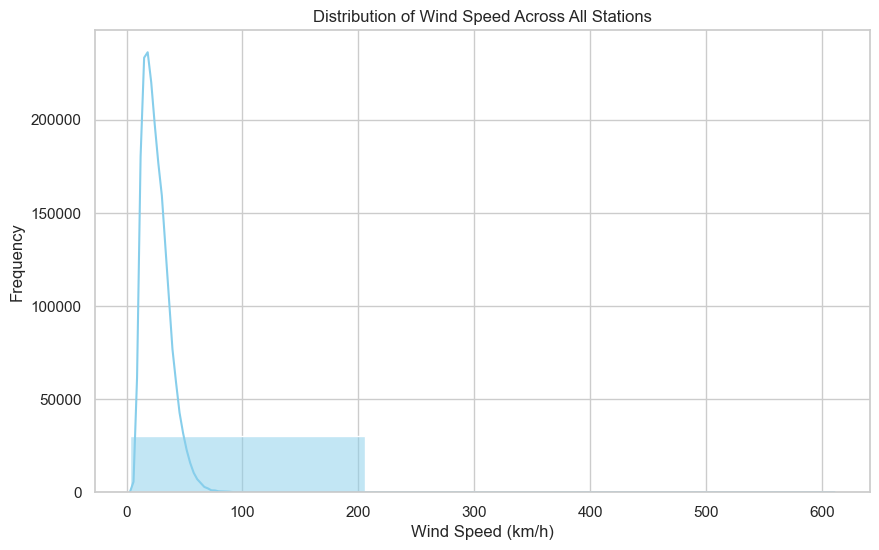

In [5]:
sns.set(style='whitegrid')

# Create a histogram to show the distribution of wind speed
plt.figure(figsize=(10, 6))
sns.histplot(data=wind_data, x='wind_speed', kde=True, bins=3, color='skyblue')
plt.title('Distribution of Wind Speed Across All Stations')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [6]:
alert_data[['station','vri','alert']]

station vri  alert
0       AMO   H     35
1       ANE   M     35
2       ARH   L     40
3       AVO   H     35
4       AVY   L     45
..      ...  ..    ...
211     WST   M     45
212     WSY   L     45
213     WWY   M     45
214     WYN   M     45
215     YSA   L     42

[216 rows x 3 columns]

In [7]:
station_data

objectid weatherstationcode     weatherstationname  scadartuid  \
0           1                CBD               Carlsbad      5158.0   
1           2                CCR             Cuca Ranch      1915.0   
2           3                CES        Country Estates      1995.0   
3         208                ROV      Rim of the Valley      4818.0   
4           5                CHO           Chollas Lake      5182.0   
..        ...                ...                    ...         ...   
218       146                HAU        Hauser Mountain      4828.0   
219       223                BOB       Bob Owens Canyon      4841.0   
220       224                MWG  MT. WOODSON GOLF CLUB      4827.0   
221         4                CGD             Cole Grade      1957.0   
222       159                CLM               Creelman      1996.0   

    structureid            nwszone  district thomasbrospagegrid  \
0       P124785        Coastal-243       6.0            1126-G1   
1       Z118027       Mountain-258       3.0            1052-A5   
2       Z416611  Inland Valley-250       3.0            1153-G7   
3       Z416170  Inland Valley-250       3.0            1071-B1   
4       P970712  Inland Valley-250       1.0            1270-C7   
..          ...                ...       ...                ...   
218     Z972858       Mountain-258       4.0            1316-J1   
219     Z571472  Inland Valley-250       4.0            1295-A7   
220     P518334  INLAND VALLEY-250       3.0            1171-D3   
221     Z416193  Inland Valley-250       3.0            1070-G1   
222     Z104188  Inland Valley-250       3.0            1172-G2   

    constructionstatus  creationuser  ... elevation twinguid hftd zone1idc  \
0                    A  seu_gis_elec  ...        72      NaN    1        N   
1                    A  seu_gis_elec  ...      2513      NaN    3        N   
2                    A  seu_gis_elec  ...      1822      NaN    3        N   
3                    A      gwharris  ...      1533      NaN    3        N   
4                    A  seu_gis_elec  ...       448      NaN    1        N   
..                 ...           ...  ...       ...      ...  ...      ...   
218                  A       calonzo  ...      3189      NaN    3        N   
219                  A       CLCosby  ...      2671      NaN    3        N   
220                  A        KSTETS  ...      1717      NaN    3        N   
221                  A  seu_gis_elec  ...      1691      NaN    2        N   
222                  A  seu_gis_elec  ...      1440      NaN    2        N   

     hftdidc  gdb_geomattr_data                                globalid  \
0          N                NaN  {ED5DE7F2-F63A-41EA-BA80-9F71495334A3}   
1          Y                NaN  {82759049-437B-4A5C-8796-10C8D7098C5B}   
2          Y                NaN  {6A3A6DAD-6CD1-43B7-A0FE-72A52A46A4F7}   
3          Y                NaN  {AD1AEA81-BC74-4954-8D25-421C79F40D88}   
4          N                NaN  {1294A90A-9558-458E-8EA5-9D15B2A16D8D}   
..       ...                ...                                     ...   
218        Y                NaN  {EFF383D5-266E-4B6D-A25B-C71D3B52247B}   
219        Y                NaN  {9D545CF5-97C2-4EA1-A794-DEDCFD1D4437}   
220        Y                NaN  {BCF2F0F6-C481-43A2-B237-DD05D83E0D13}   
221        Y                NaN  {D0BC3059-6829-459B-AD6E-3446161600EF}   
222        Y                NaN  {5FA1E82B-9378-4371-ADA0-8F7AC7F93B1B}   

                                    shape  shape_srid  snapshot_date  
0      POINT (1540299.9388 12029375.0425)        4431     2024-10-04  
1     POINT (1667010.27856 12088881.1767)        4431     2024-10-04  
2     POINT (1703876.2967 11989778.75946)        4431     2024-10-04  
3    POINT (1646528.56915 12083236.45575)        4431     2024-10-04  
4     POINT (1619955.10724 11883209.4286)        4431     2024-10-04  
..                                    ...         ...            ...  
218    POINT

In [8]:
cleaned_station_data = station_data.drop_duplicates(subset=['weatherstationcode'], keep='first')

In [9]:
#first merge station data and alert_data to get the alert data for each station
merged = pd.merge(cleaned_station_data,alert_data[['station','vri','alert']], left_on = 'weatherstationcode', right_on = 'station').drop('station',axis = 1)
merged

objectid weatherstationcode     weatherstationname  scadartuid  \
0           1                CBD               Carlsbad      5158.0   
1           2                CCR             Cuca Ranch      1915.0   
2           3                CES        Country Estates      1995.0   
3         208                ROV      Rim of the Valley      4818.0   
4           5                CHO           Chollas Lake      5182.0   
..        ...                ...                    ...         ...   
210       146                HAU        Hauser Mountain      4828.0   
211       223                BOB       Bob Owens Canyon      4841.0   
212       224                MWG  MT. WOODSON GOLF CLUB      4827.0   
213         4                CGD             Cole Grade      1957.0   
214       159                CLM               Creelman      1996.0   

    structureid            nwszone  district thomasbrospagegrid  \
0       P124785        Coastal-243       6.0            1126-G1   
1       Z118027       Mountain-258       3.0            1052-A5   
2       Z416611  Inland Valley-250       3.0            1153-G7   
3       Z416170  Inland Valley-250       3.0            1071-B1   
4       P970712  Inland Valley-250       1.0            1270-C7   
..          ...                ...       ...                ...   
210     Z972858       Mountain-258       4.0            1316-J1   
211     Z571472  Inland Valley-250       4.0            1295-A7   
212     P518334  INLAND VALLEY-250       3.0            1171-D3   
213     Z416193  Inland Valley-250       3.0            1070-G1   
214     Z104188  Inland Valley-250       3.0            1172-G2   

    constructionstatus  creationuser  ... hftd zone1idc hftdidc  \
0                    A  seu_gis_elec  ...    1        N       N   
1                    A  seu_gis_elec  ...    3        N       Y   
2                    A  seu_gis_elec  ...    3        N       Y   
3                    A      gwharris  ...    3        N       Y   
4                    A  seu_gis_elec  ...    1        N       N   
..                 ...           ...  ...  ...      ...     ...   
210                  A       calonzo  ...    3        N       Y   
211                  A       CLCosby  ...    3        N       Y   
212                  A        KSTETS  ...    3        N       Y   
213                  A  seu_gis_elec  ...    2        N       Y   
214                  A  seu_gis_elec  ...    2        N       Y   

    gdb_geomattr_data                                globalid  \
0                 NaN  {ED5DE7F2-F63A-41EA-BA80-9F71495334A3}   
1                 NaN  {82759049-437B-4A5C-8796-10C8D7098C5B}   
2                 NaN  {6A3A6DAD-6CD1-43B7-A0FE-72A52A46A4F7}   
3                 NaN  {AD1AEA81-BC74-4954-8D25-421C79F40D88}   
4                 NaN  {1294A90A-9558-458E-8EA5-9D15B2A16D8D}   
..                ...                                     ...   
210               NaN  {EFF383D5-266E-4B6D-A25B-C71D3B52247B}   
211               NaN  {9D545CF5-97C2-4EA1-A794-DEDCFD1D4437}   
212               NaN  {BCF2F0F6-C481-43A2-B237-DD05D83E0D13}   
213               NaN  {D0BC3059-6829-459B-AD6E-3446161600EF}   
214               NaN  {5FA1E82B-9378-4371-ADA0-8F7AC7F93B1B}   

                                    shape  shape_srid  snapshot_date  vri  \
0      POINT (1540299.9388 12029375.0425)        4431     2024-10-04    M   
1     POINT (1667010.27856 12088881.1767)        4431     2024-10-04    M   
2     POINT (1703876.2967 11989778.75946)        4431     2024-10-04    M   
3    POINT (1646528.56915 12083236.45575)        4431     2024-10-04    L   
4     POINT (1619955.10724 11883209.4286)        4431     2024-10-04    L   
..                                    ...         ...            ...  ...   
210    POINT (1776616.0495 11855234.4288)        4431     2024-10-04  NaN   
211  POINT (1732301.64404 11860546.56055)        4431     2024-10-04    M   
212    POINT (1648988.038 11985389.44244)        4431     2024-10-04

In [10]:
import pandas as pd

# Assuming you have two DataFrames: station_data and wind_data

# Perform a left merge from wind_data to station_data
merged_df = pd.merge(wind_data, merged, 
                     left_on='station', 
                     right_on='weatherstationcode', 
                     how='left')

merged_df

date  wind_speed station snapshot_date_x  objectid  \
0     2012-09-14        19.0     AMO      2023-08-02       8.0   
1     2012-09-15        20.0     AMO      2023-08-02       8.0   
2     2012-10-14        16.0     AMO      2023-08-02       8.0   
3     2012-10-26        23.0     AMO      2023-08-02       8.0   
4     2012-10-27        15.0     AMO      2023-08-02       8.0   
...          ...         ...     ...             ...       ...   
38659 2022-11-24        36.0     YSA      2023-08-02      64.0   
38660 2022-11-25        36.0     YSA      2023-08-02      64.0   
38661 2022-12-21        18.0     YSA      2023-08-02      64.0   
38662 2022-12-24        31.0     YSA      2023-08-02      64.0   
38663 2022-12-25        26.0     YSA      2023-08-02      64.0   

      weatherstationcode  weatherstationname  scadartuid structureid  \
0                    AMO           Ammo Dump      1922.0      P28656   
1                    AMO           Ammo Dump      1922.0      P28656   
2                    AMO           Ammo Dump      1922.0      P28656   
3                    AMO           Ammo Dump      1922.0      P28656   
4                    AMO           Ammo Dump      1922.0      P28656   
...                  ...                 ...         ...         ...   
38659                YSA  Santa Ysabel North      1908.0     Z214383   
38660                YSA  Santa Ysabel North      1908.0     Z214383   
38661                YSA  Santa Ysabel North      1908.0     Z214383   
38662                YSA  Santa Ysabel North      1908.0     Z214383   
38663                YSA  Santa Ysabel North      1908.0     Z214383   

                 nwszone  ...  hftd zone1idc hftdidc gdb_geomattr_data  \
0      Inland Valley-250  ...   2.0        N       Y               NaN   
1      Inland Valley-250  ...   2.0        N       Y               NaN   
2      Inland Valley-250  ...   2.0        N       Y               NaN   
3      Inland Valley-250  ...   2.0        N       Y               NaN   
4      Inland Valley-250  ...   2.0        N       Y               NaN   
...                  ...  ...   ...      ...     ...               ...   
38659       Mountain-258  ...   3.0        N       Y               NaN   
38660       Mountain-258  ...   3.0        N       Y               NaN   
38661       Mountain-258  ...   3.0        N       Y               NaN   
38662       Mountain-258  ...   3.0        N       Y               NaN   
38663       Mountain-258  ...   3.0        N       Y               NaN   

                                     globalid  \
0      {90874863-3E3A-4D88-A597-C531DBEE6E90}   
1      {90874863-3E3A-4D88-A597-C531DBEE6E90}   
2      {90874863-3E3A-4D88-A597-C531DBEE6E90}   
3      {90874863-3E3A-4D88-A597-C531DBEE6E90}   
4      {90874863-3E3A-4D88-A597-C531DBEE6E90}   
...                                       ...   
38659  {7CE455DC-194A-4A02-BFCE-58D5218C9FE0}   
38660  {7CE455DC-194A-4A02-BFCE-58D5218C9FE0}   
38661  {7CE455DC-194A-4A02-BFCE-58D5218C9FE0}   
38662  {7CE455DC-194A-4A02-BFCE-58D5218C9FE0}   
38663  {7CE455DC-194A-4A02-BFCE-58D5218C9FE0}   

                                     shape shape_srid snapshot_date_y  vri  \
0       POINT (1556019.1347 12109260.1389)     4431.0      2024-10-04    H   
1       POINT (1556019.1347 12109260.1389)     4431.0      2024-10-04    H   
2       POINT (1556019.1347 12109260.1389)     4431.0      2024-10-04    H   
3       POINT (1556019.1347 12109260.1389)     4431.0      2024-10-04    H   
4       POINT (1556019.1347 12109260.1389)     4431.0      2024-10-04    H   
...                                    ...        ...             ...  ...   
38659  POINT (1740909.08905 12020580.7369)     4431.0      2024-10-04    L   
38660  POINT (1740909.08905 12020580.7369)     4431.0      2024-10-04    L   
38661  POINT (1740909.08905 12020580.7369)     4431.0      2024-10-04    L   
38662  POINT (1740909.08905 12020580.7369)     4431.0      2024-10-04    L   
38663  POINT (1740

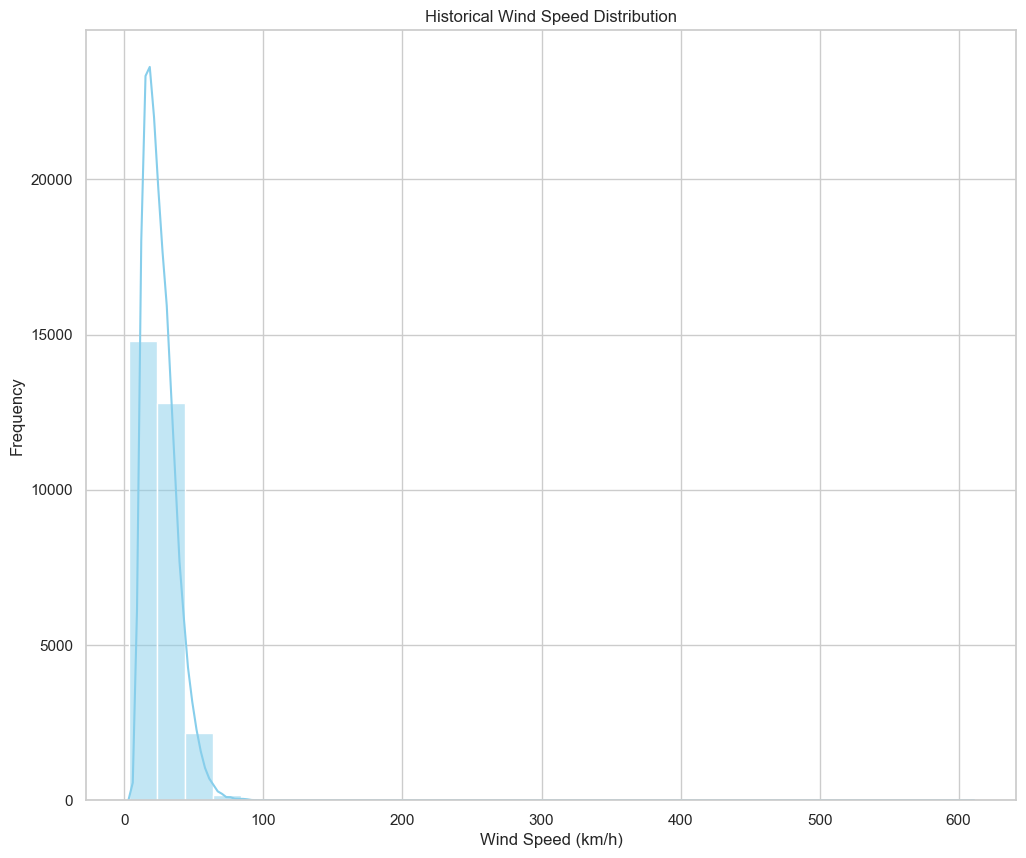

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with wind speed data
plt.figure(figsize=(12,10))
sns.histplot(data=merged_df, x='wind_speed', kde=True, bins=30, color='skyblue')
plt.title('Historical Wind Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [12]:
merged_df['wind_speed'].describe()

count    29940.000000
mean        25.801236
std         11.895371
min          3.000000
25%         17.000000
50%         24.000000
75%         32.000000
max        611.000000
Name: wind_speed, dtype: float64

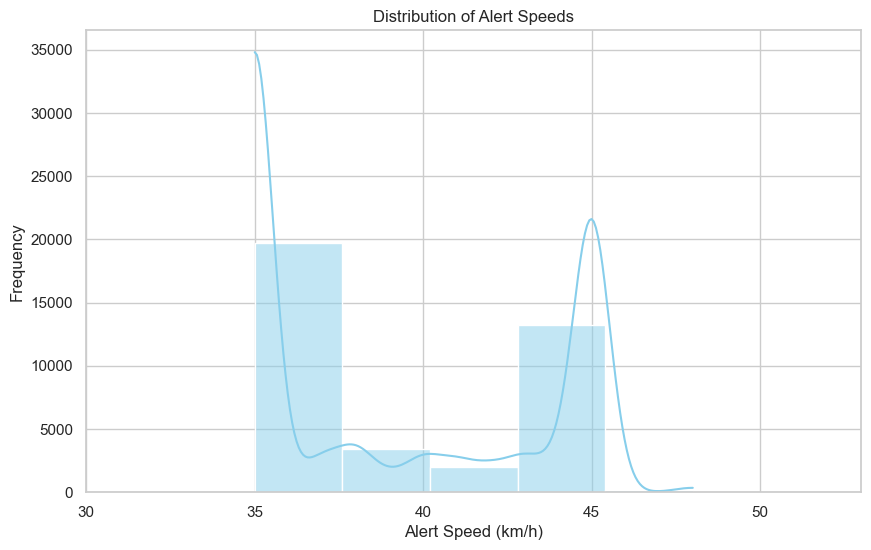

In [13]:
# Create a histogram to show the distribution of alert speeds
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='alert', bins=5, kde=True, color='skyblue')

# Add titles and labels
plt.title('Distribution of Alert Speeds')
plt.xlabel('Alert Speed (km/h)')
plt.ylabel('Frequency')

# Adjust x-axis to show only the range of alert speeds
plt.xlim(merged_df['alert'].min() - 5, merged_df['alert'].max() + 5)

# Display the histogram
plt.show()

In [14]:
station_data

objectid weatherstationcode     weatherstationname  scadartuid  \
0           1                CBD               Carlsbad      5158.0   
1           2                CCR             Cuca Ranch      1915.0   
2           3                CES        Country Estates      1995.0   
3         208                ROV      Rim of the Valley      4818.0   
4           5                CHO           Chollas Lake      5182.0   
..        ...                ...                    ...         ...   
218       146                HAU        Hauser Mountain      4828.0   
219       223                BOB       Bob Owens Canyon      4841.0   
220       224                MWG  MT. WOODSON GOLF CLUB      4827.0   
221         4                CGD             Cole Grade      1957.0   
222       159                CLM               Creelman      1996.0   

    structureid            nwszone  district thomasbrospagegrid  \
0       P124785        Coastal-243       6.0            1126-G1   
1       Z118027       Mountain-258       3.0            1052-A5   
2       Z416611  Inland Valley-250       3.0            1153-G7   
3       Z416170  Inland Valley-250       3.0            1071-B1   
4       P970712  Inland Valley-250       1.0            1270-C7   
..          ...                ...       ...                ...   
218     Z972858       Mountain-258       4.0            1316-J1   
219     Z571472  Inland Valley-250       4.0            1295-A7   
220     P518334  INLAND VALLEY-250       3.0            1171-D3   
221     Z416193  Inland Valley-250       3.0            1070-G1   
222     Z104188  Inland Valley-250       3.0            1172-G2   

    constructionstatus  creationuser  ... elevation twinguid hftd zone1idc  \
0                    A  seu_gis_elec  ...        72      NaN    1        N   
1                    A  seu_gis_elec  ...      2513      NaN    3        N   
2                    A  seu_gis_elec  ...      1822      NaN    3        N   
3                    A      gwharris  ...      1533      NaN    3        N   
4                    A  seu_gis_elec  ...       448      NaN    1        N   
..                 ...           ...  ...       ...      ...  ...      ...   
218                  A       calonzo  ...      3189      NaN    3        N   
219                  A       CLCosby  ...      2671      NaN    3        N   
220                  A        KSTETS  ...      1717      NaN    3        N   
221                  A  seu_gis_elec  ...      1691      NaN    2        N   
222                  A  seu_gis_elec  ...      1440      NaN    2        N   

     hftdidc  gdb_geomattr_data                                globalid  \
0          N                NaN  {ED5DE7F2-F63A-41EA-BA80-9F71495334A3}   
1          Y                NaN  {82759049-437B-4A5C-8796-10C8D7098C5B}   
2          Y                NaN  {6A3A6DAD-6CD1-43B7-A0FE-72A52A46A4F7}   
3          Y                NaN  {AD1AEA81-BC74-4954-8D25-421C79F40D88}   
4          N                NaN  {1294A90A-9558-458E-8EA5-9D15B2A16D8D}   
..       ...                ...                                     ...   
218        Y                NaN  {EFF383D5-266E-4B6D-A25B-C71D3B52247B}   
219        Y                NaN  {9D545CF5-97C2-4EA1-A794-DEDCFD1D4437}   
220        Y                NaN  {BCF2F0F6-C481-43A2-B237-DD05D83E0D13}   
221        Y                NaN  {D0BC3059-6829-459B-AD6E-3446161600EF}   
222        Y                NaN  {5FA1E82B-9378-4371-ADA0-8F7AC7F93B1B}   

                                    shape  shape_srid  snapshot_date  
0      POINT (1540299.9388 12029375.0425)        4431     2024-10-04  
1     POINT (1667010.27856 12088881.1767)        4431     2024-10-04  
2     POINT (1703876.2967 11989778.75946)        4431     2024-10-04  
3    POINT (1646528.56915 12083236.45575)        4431     2024-10-04  
4     POINT (1619955.10724 11883209.4286)        4431     2024-10-04  
..                                    ...         ...            ...  
218    POINT

In [15]:
import pandas as pd
import re

# Assuming station_data is your existing DataFrame

# Extract longitude and latitude from the 'shape' column
station_data[['longitude', 'latitude']] = station_data['shape'].str.extract(r'POINT \(([^ ]+) ([^\)]+)\)')

# Convert extracted coordinates to float
station_data['longitude'] = station_data['longitude'].astype(float)
station_data['latitude'] = station_data['latitude'].astype(float)

# Show the modified DataFrame with extracted coordinates
print(station_data['longitude'])


0      1.540300e+06
1      1.667010e+06
2      1.703876e+06
3      1.646529e+06
4      1.619955e+06
           ...     
218    1.776616e+06
219    1.732302e+06
220    1.648988e+06
221    1.635643e+06
222    1.679947e+06
Name: longitude, Length: 223, dtype: float64


In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [17]:
geometry = [Point(xy) for xy in zip(station_data['longitude'], station_data['latitude'])]
gdf = gpd.GeoDataFrame(station_data, geometry=geometry)


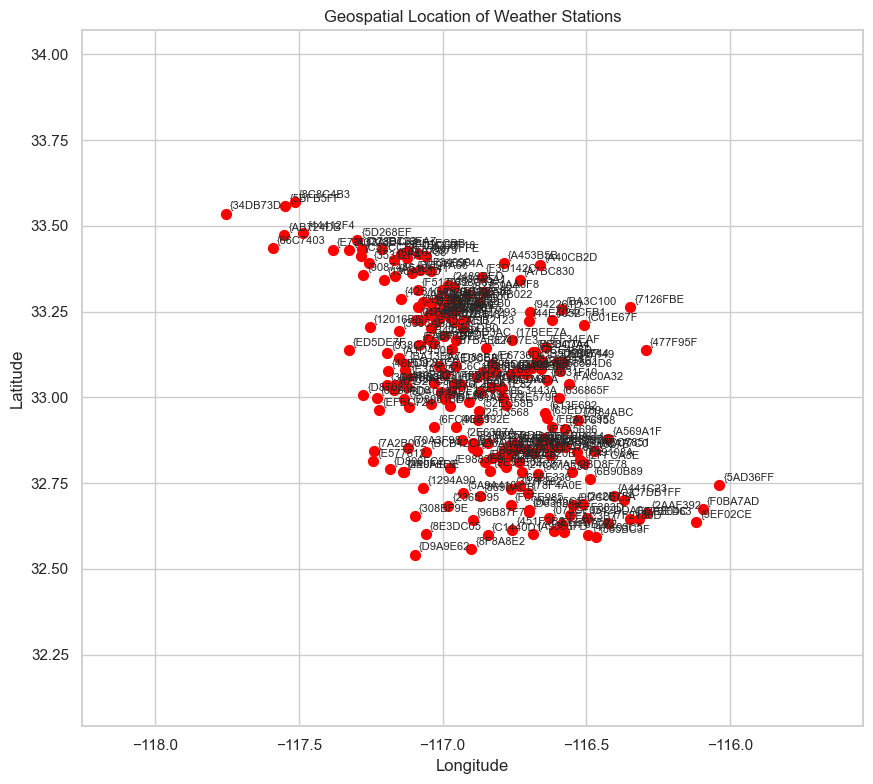

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Convert the DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(station_data['longitude'], station_data['latitude'])]
gdf = gpd.GeoDataFrame(station_data, geometry=geometry)

# Set the coordinate reference system (CRS) to match your data
# The CRS EPSG:4431 is used based on the 'shape_srid' column in your original data
gdf.set_crs(epsg=4431, inplace=True)

# Convert to a more common CRS for visualization (e.g., WGS84)
gdf = gdf.to_crs(epsg=4326)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the weather stations
gdf.plot(ax=ax, color='red', markersize=50)

# Customize the plot
plt.title('Geospatial Location of Weather Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add labels for each station
for idx, row in gdf.iterrows():
    plt.annotate(row['globalid'][:8], (row.geometry.x, row.geometry.y), xytext=(3, 3), 
                 textcoords="offset points", fontsize=8)

# Adjust the plot extent to focus on the area where stations are located
margin = 0.5  # degrees
plt.xlim(gdf.total_bounds[0] - margin, gdf.total_bounds[2] + margin)
plt.ylim(gdf.total_bounds[1] - margin, gdf.total_bounds[3] + margin)

plt.tight_layout()
plt.show()


In [19]:
states = gpd.read_file('data/usa-states-census-2014.shp')

In [20]:
states = states.to_crs("EPSG:4326")

In [21]:
california = states[states['NAME'] == 'California']

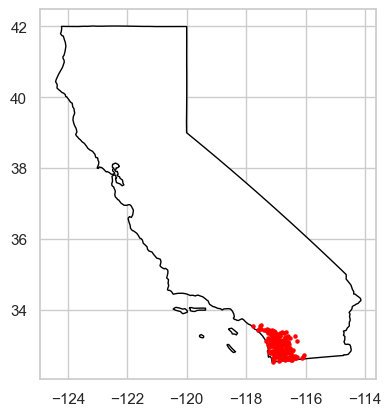

In [22]:
fig, ax = plt.subplots()
california.plot(ax=ax , color = 'white', edgecolor = 'black')
gdf.plot(ax=ax, color='red', markersize=5)
plt.show();

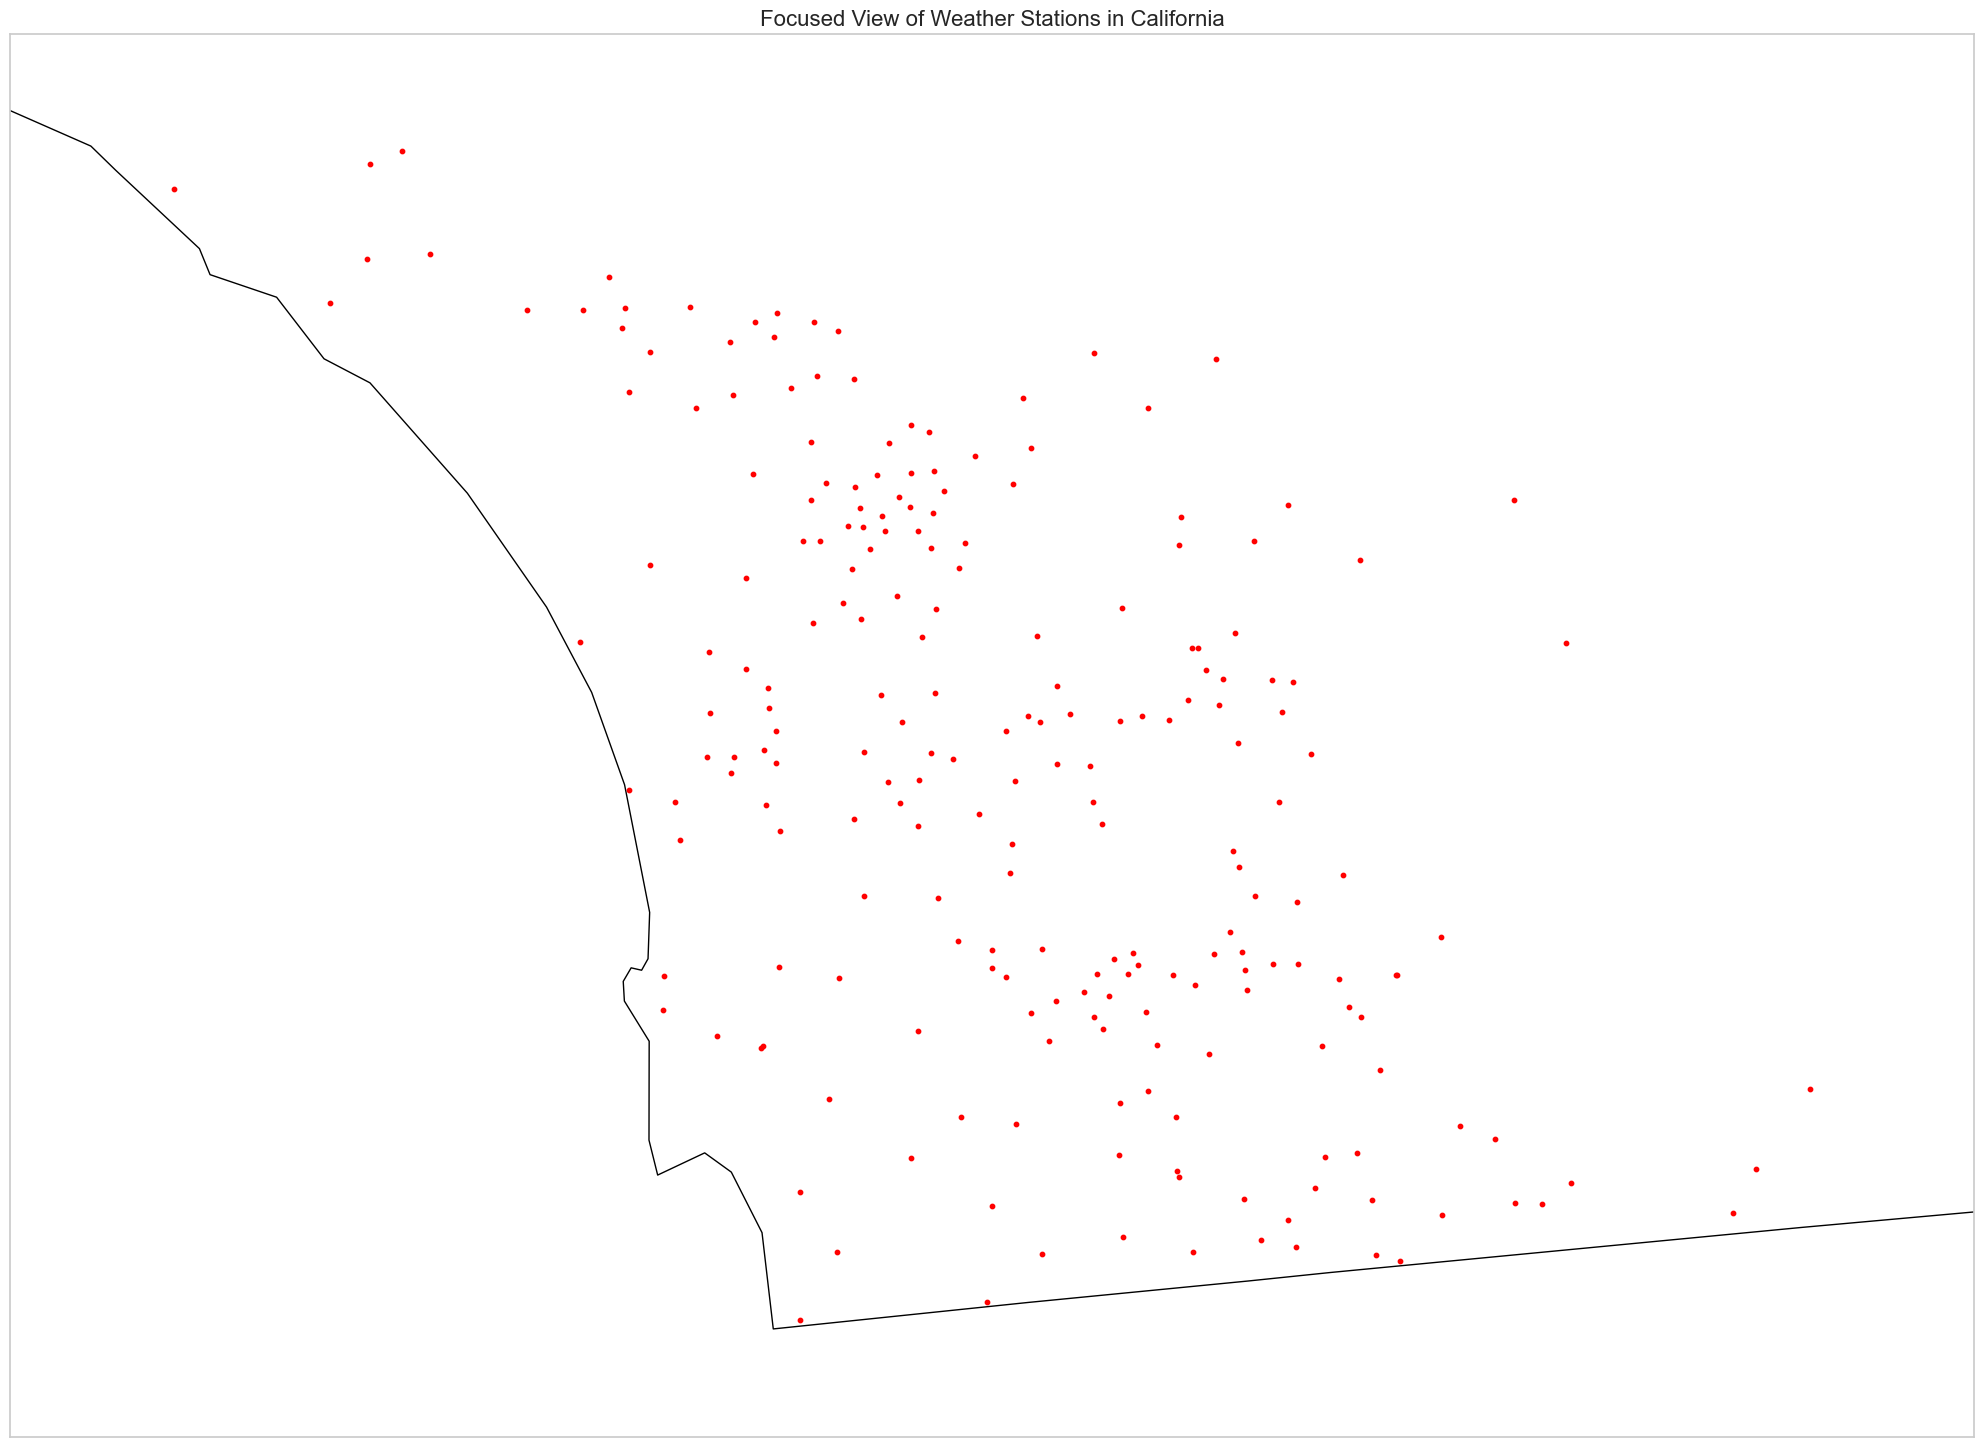

In [23]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Assuming california and gdf are already defined GeoDataFrames

fig, ax = plt.subplots(figsize=(20, 20))

# Plot California
california.plot(ax=ax, color='white', edgecolor='black')

# Plot the points
gdf.plot(ax=ax, color='red', markersize=10)

# Get the bounds of the gdf
minx, miny, maxx, maxy = gdf.total_bounds

# Add a buffer around the points (e.g., 10% of the range)
buffer_x = (maxx - minx) * 0.1
buffer_y = (maxy - miny) * 0.1

# Set the axis limits to focus on the area of the points
ax.set_xlim(minx - buffer_x, maxx + buffer_x)
ax.set_ylim(miny - buffer_y, maxy + buffer_y)

# Remove axis ticks
ax.set_xticks([])
ax.set_yticks([])

plt.title('Focused View of Weather Stations in California', fontsize=16)
plt.tight_layout()
plt.show()


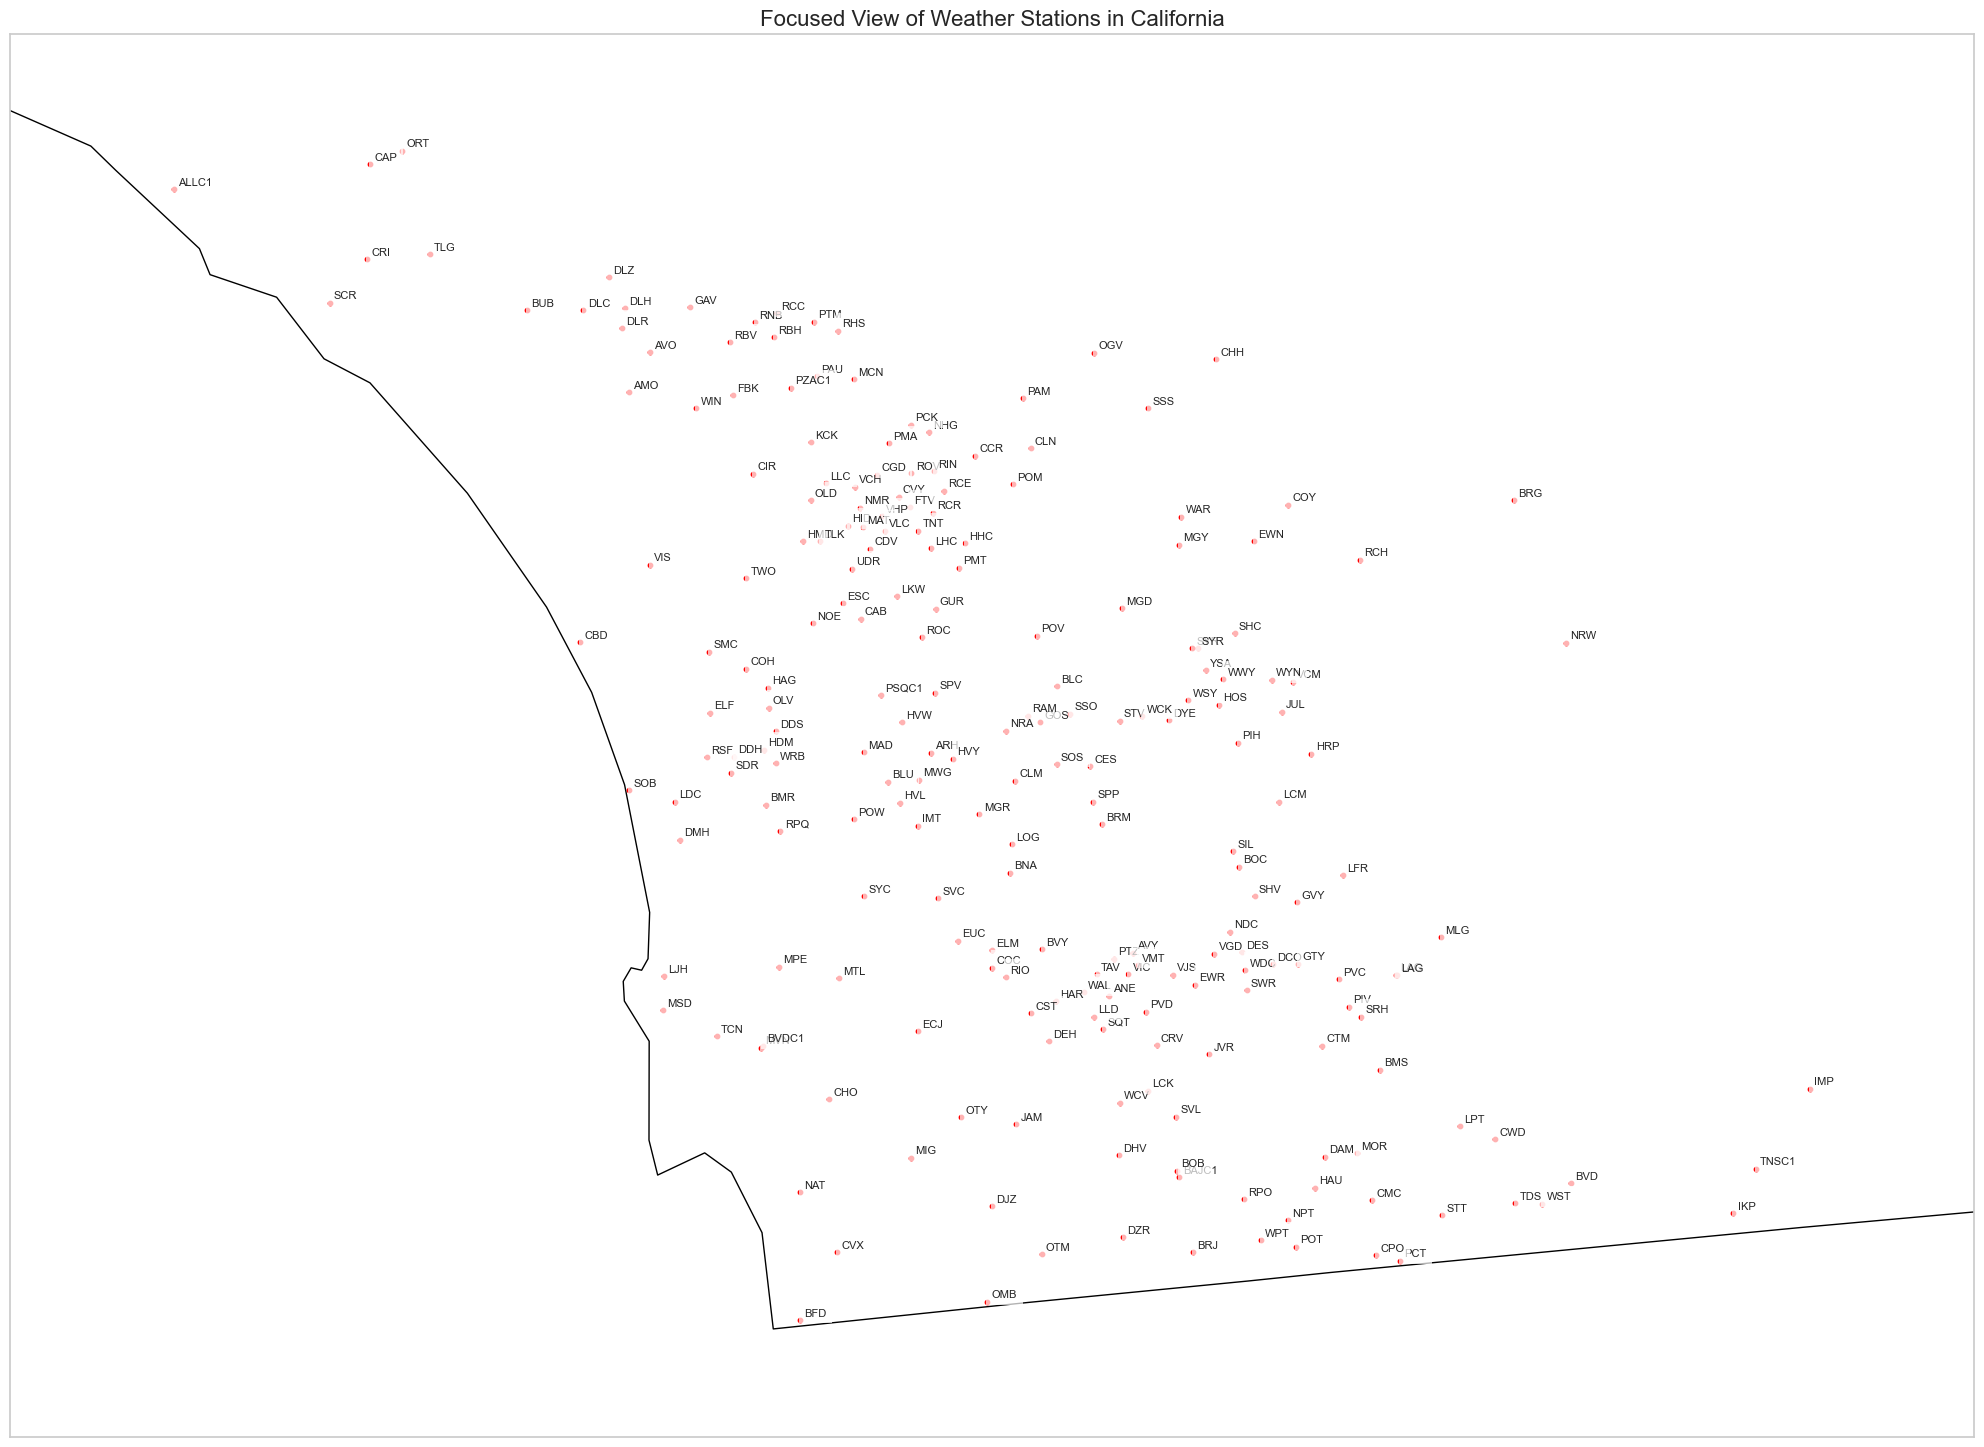

In [24]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Assuming california and gdf are already defined GeoDataFrames

fig, ax = plt.subplots(figsize=(20, 20))

# Plot California
california.plot(ax=ax, color='white', edgecolor='black')

# Plot the points
gdf.plot(ax=ax, color='red', markersize=10)

# Get the bounds of the gdf
minx, miny, maxx, maxy = gdf.total_bounds

# Add a buffer around the points (e.g., 10% of the range)
buffer_x = (maxx - minx) * 0.1
buffer_y = (maxy - miny) * 0.1

# Set the axis limits to focus on the area of the points
ax.set_xlim(minx - buffer_x, maxx + buffer_x)
ax.set_ylim(miny - buffer_y, maxy + buffer_y)

# Remove axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Add labels for each point
for idx, row in gdf.iterrows():
    ax.annotate(row['weatherstationcode'], 
                (row.geometry.x, row.geometry.y),
                xytext=(3, 3),
                textcoords="offset points",
                fontsize=8,
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7),
                zorder=3)

plt.title('Focused View of Weather Stations in California', fontsize=16)
plt.tight_layout()
plt.show()


In [25]:
gdf

objectid weatherstationcode     weatherstationname  scadartuid  \
0           1                CBD               Carlsbad      5158.0   
1           2                CCR             Cuca Ranch      1915.0   
2           3                CES        Country Estates      1995.0   
3         208                ROV      Rim of the Valley      4818.0   
4           5                CHO           Chollas Lake      5182.0   
..        ...                ...                    ...         ...   
218       146                HAU        Hauser Mountain      4828.0   
219       223                BOB       Bob Owens Canyon      4841.0   
220       224                MWG  MT. WOODSON GOLF CLUB      4827.0   
221         4                CGD             Cole Grade      1957.0   
222       159                CLM               Creelman      1996.0   

    structureid            nwszone  district thomasbrospagegrid  \
0       P124785        Coastal-243       6.0            1126-G1   
1       Z118027       Mountain-258       3.0            1052-A5   
2       Z416611  Inland Valley-250       3.0            1153-G7   
3       Z416170  Inland Valley-250       3.0            1071-B1   
4       P970712  Inland Valley-250       1.0            1270-C7   
..          ...                ...       ...                ...   
218     Z972858       Mountain-258       4.0            1316-J1   
219     Z571472  Inland Valley-250       4.0            1295-A7   
220     P518334  INLAND VALLEY-250       3.0            1171-D3   
221     Z416193  Inland Valley-250       3.0            1070-G1   
222     Z104188  Inland Valley-250       3.0            1172-G2   

    constructionstatus  creationuser  ... twinguid hftd zone1idc hftdidc  \
0                    A  seu_gis_elec  ...      NaN    1        N       N   
1                    A  seu_gis_elec  ...      NaN    3        N       Y   
2                    A  seu_gis_elec  ...      NaN    3        N       Y   
3                    A      gwharris  ...      NaN    3        N       Y   
4                    A  seu_gis_elec  ...      NaN    1        N       N   
..                 ...           ...  ...      ...  ...      ...     ...   
218                  A       calonzo  ...      NaN    3        N       Y   
219                  A       CLCosby  ...      NaN    3        N       Y   
220                  A        KSTETS  ...      NaN    3        N       Y   
221                  A  seu_gis_elec  ...      NaN    2        N       Y   
222                  A  seu_gis_elec  ...      NaN    2        N       Y   

     gdb_geomattr_data                                globalid  \
0                  NaN  {ED5DE7F2-F63A-41EA-BA80-9F71495334A3}   
1                  NaN  {82759049-437B-4A5C-8796-10C8D7098C5B}   
2                  NaN  {6A3A6DAD-6CD1-43B7-A0FE-72A52A46A4F7}   
3                  NaN  {AD1AEA81-BC74-4954-8D25-421C79F40D88}   
4                  NaN  {1294A90A-9558-458E-8EA5-9D15B2A16D8D}   
..                 ...                                     ...   
218                NaN  {EFF383D5-266E-4B6D-A25B-C71D3B52247B}   
219                NaN  {9D545CF5-97C2-4EA1-A794-DEDCFD1D4437}   
220                NaN  {BCF2F0F6-C481-43A2-B237-DD05D83E0D13}   
221                NaN  {D0BC3059-6829-459B-AD6E-3446161600EF}   
222                NaN  {5FA1E82B-9378-4371-ADA0-8F7AC7F93B1B}   

                                    shape  shape_srid  snapshot_date  \
0      POINT (1540299.9388 12029375.0425)        4431     2024-10-04   
1     POINT (1667010.27856 12088881.1767)        4431     2024-10-04   
2     POINT (1703876.2967 11989778.75946)        4431     2024-10-04   
3    POINT (1646528.56915 12083236.45575)        4431     2024-10-04   
4     POINT (1619955.10724 11883209.4286)        4431     2024-10-04   
..                                    ...         ...            ...   
218    POINT (1776616.0495 11855234.4288)        4431     2024-10-04   
219  POINT (1732301.64404 11860546.56055)        4431     2024-10

In [26]:
sandiego = gpd.read_file(r"C:\Users\William\OneDrive\Desktop\dsc180a\data\Zoning_Base_SD.csv")
df =sandiego
df

objectid zone_name           imp_date    ordnum           shape_Length  \
0           1    AG-1-1  2/28/2006 0:00:00  R-301263    281.423965934912417   
1           2    AG-1-1  2/28/2006 0:00:00  R-301263   1618.451258078252749   
2           3    AG-1-1  2/28/2006 0:00:00  R-301263   2895.863474071389646   
3           4    AG-1-1  2/28/2006 0:00:00  R-301263   6102.709276135044092   
4           5    AG-1-1  2/28/2006 0:00:00  R-301263  18410.093817696335464   
...       ...       ...                ...       ...                    ...   
3679     3680    RM-2-5  2/28/2006 0:00:00  R-301263   1562.462090415945113   
3680     3681    CC-1-3  2/28/2006 0:00:00  R-301263   6094.947316982421398   
3681     3682    RT-1-2  2/28/2006 0:00:00  R-301263   4020.723873636491589   
3682     3683    CC-1-3  12/8/2017 0:00:00   O-20878   2276.372363671413495   
3683     3684    RX-1-1  2/28/2006 0:00:00  R-301263   6511.299277922412330   

                   shape_Area  
0        2601.150007750304212  
1       41933.651499900741328  
2      230708.071490643487778  
3      464317.530549717659596  
4     9813908.638568492606282  
...                       ...  
3679    94937.257965533673996  
3680  1383681.339018402853981  
3681   830810.041996388114057  
3682   306722.575751174357720  
3683  1515345.572546190349385  

[3684 rows x 6 columns]

In [27]:
sandiego = gpd.read_file(r"C:\Users\William\OneDrive\Desktop\dsc180a\data\San Diego.csv")
df = sandiego
df

field_1        GEOID                                           geometry  \
0         0  06073007701  POLYGON ((-13052014.93 3867748.53, -13051974.6...   
1         1  06073008002  POLYGON ((-13052206.51 3870188.93, -13052193.6...   
2         2  06073007903  POLYGON ((-13051964.72 3869215.2, -13051923.76...   
3         3  06073008364  POLYGON ((-13050548.18 3875343.81, -13050522.3...   
4         4  06073008305  POLYGON ((-13051530.24 3879241.24, -13051529.9...   
..      ...          ...                                                ...   
623     623  06073020403  POLYGON ((-13035010.54 3909697.92, -13034972.4...   
624     624  06073017015  POLYGON ((-13033181.79 3898518.81, -13033173.3...   
625     625  06073020211  POLYGON ((-13032500.4 3913774.57, -13032459.32...   
626     626  06073020109  POLYGON ((-13033438.04 3914199.33, -13033420.4...   
627     627  06073020709  POLYGON ((-13029476.96 3912060.39, -13029476.3...   

    median_age total_pop total_pop_white tt_work hh_total hh_female  \
0         31.9    4074.0          3737.0  2243.0   4074.0     301.0   
1         37.0    2968.0          2677.0  1558.0   2968.0     296.0   
2         30.2    4660.0          4079.0  3100.0   4660.0     425.0   
3         30.1    5811.0          3135.0  3169.0   5811.0     448.0   
4         27.1    2002.0          1053.0   879.0   2002.0     152.0   
..         ...       ...             ...     ...      ...       ...   
623       35.9    4071.0          2805.0  1955.0   4071.0     350.0   
624       41.7    8107.0          5286.0  3881.0   8107.0    1164.0   
625       30.2    7005.0          5014.0  3195.0   7005.0     684.0   
626       33.7    5622.0          4550.0  2809.0   5622.0     531.0   
627       41.6    7848.0          5633.0  3512.0   7848.0     808.0   

    total_bachelor  ... income_gini total_housing_units total_rented  \
0              0.0  ...      0.4182              2394.0       1499.0   
1              0.0  ...      0.4094              1117.0        345.0   
2              0.0  ...      0.4528              2582.0       1713.0   
3              0.0  ...      0.3986              2902.0       2090.0   
4              0.0  ...      0.4797               815.0        706.0   
..             ...  ...         ...                 ...          ...   
623          112.0  ...       0.346              1242.0        340.0   
624           14.0  ...      0.3995              3239.0       1057.0   
625          258.0  ...      0.3924              2117.0       1437.0   
626          129.0  ...      0.3093              1312.0        432.0   
627           88.0  ...      0.3628              2491.0        318.0   

    median_no_rooms median_house_value  \
0               3.9           852000.0   
1               5.5           893300.0   
2               3.8           423500.0   
3               3.7           601100.0   
4               4.0           517900.0   
..              ...                ...   
623             5.9           376000.0   
624             5.2           568900.0   
625             3.9           338000.0   
626             5.4           351100.0   
627             6.1           507000.0   

                                                  NAME state county   tract  \
0     Census Tract 77.01, San Diego County, California    06    073  007701   
1     Census Tract 80.02, San Diego County, California    06    073  008002   
2     Census Tract 79.03, San Diego County, California    06    073  007903   
3     Census Tract 83.64, San Diego County, California    06    073  008364   
4     Census Tract 83.05, San Diego County, California    06    073  008305   
..                                                 ...   ...    ...     ...   
623  Census Tract 204.03, San Diego County, California    06    073  020403   
624  Census Tract 170.15, San Diego County, California    06    073  017015   
625  Census Tract 202.11, San Diego County, California    06    073  020211   
626  Census Tract 201.09, San Diego County

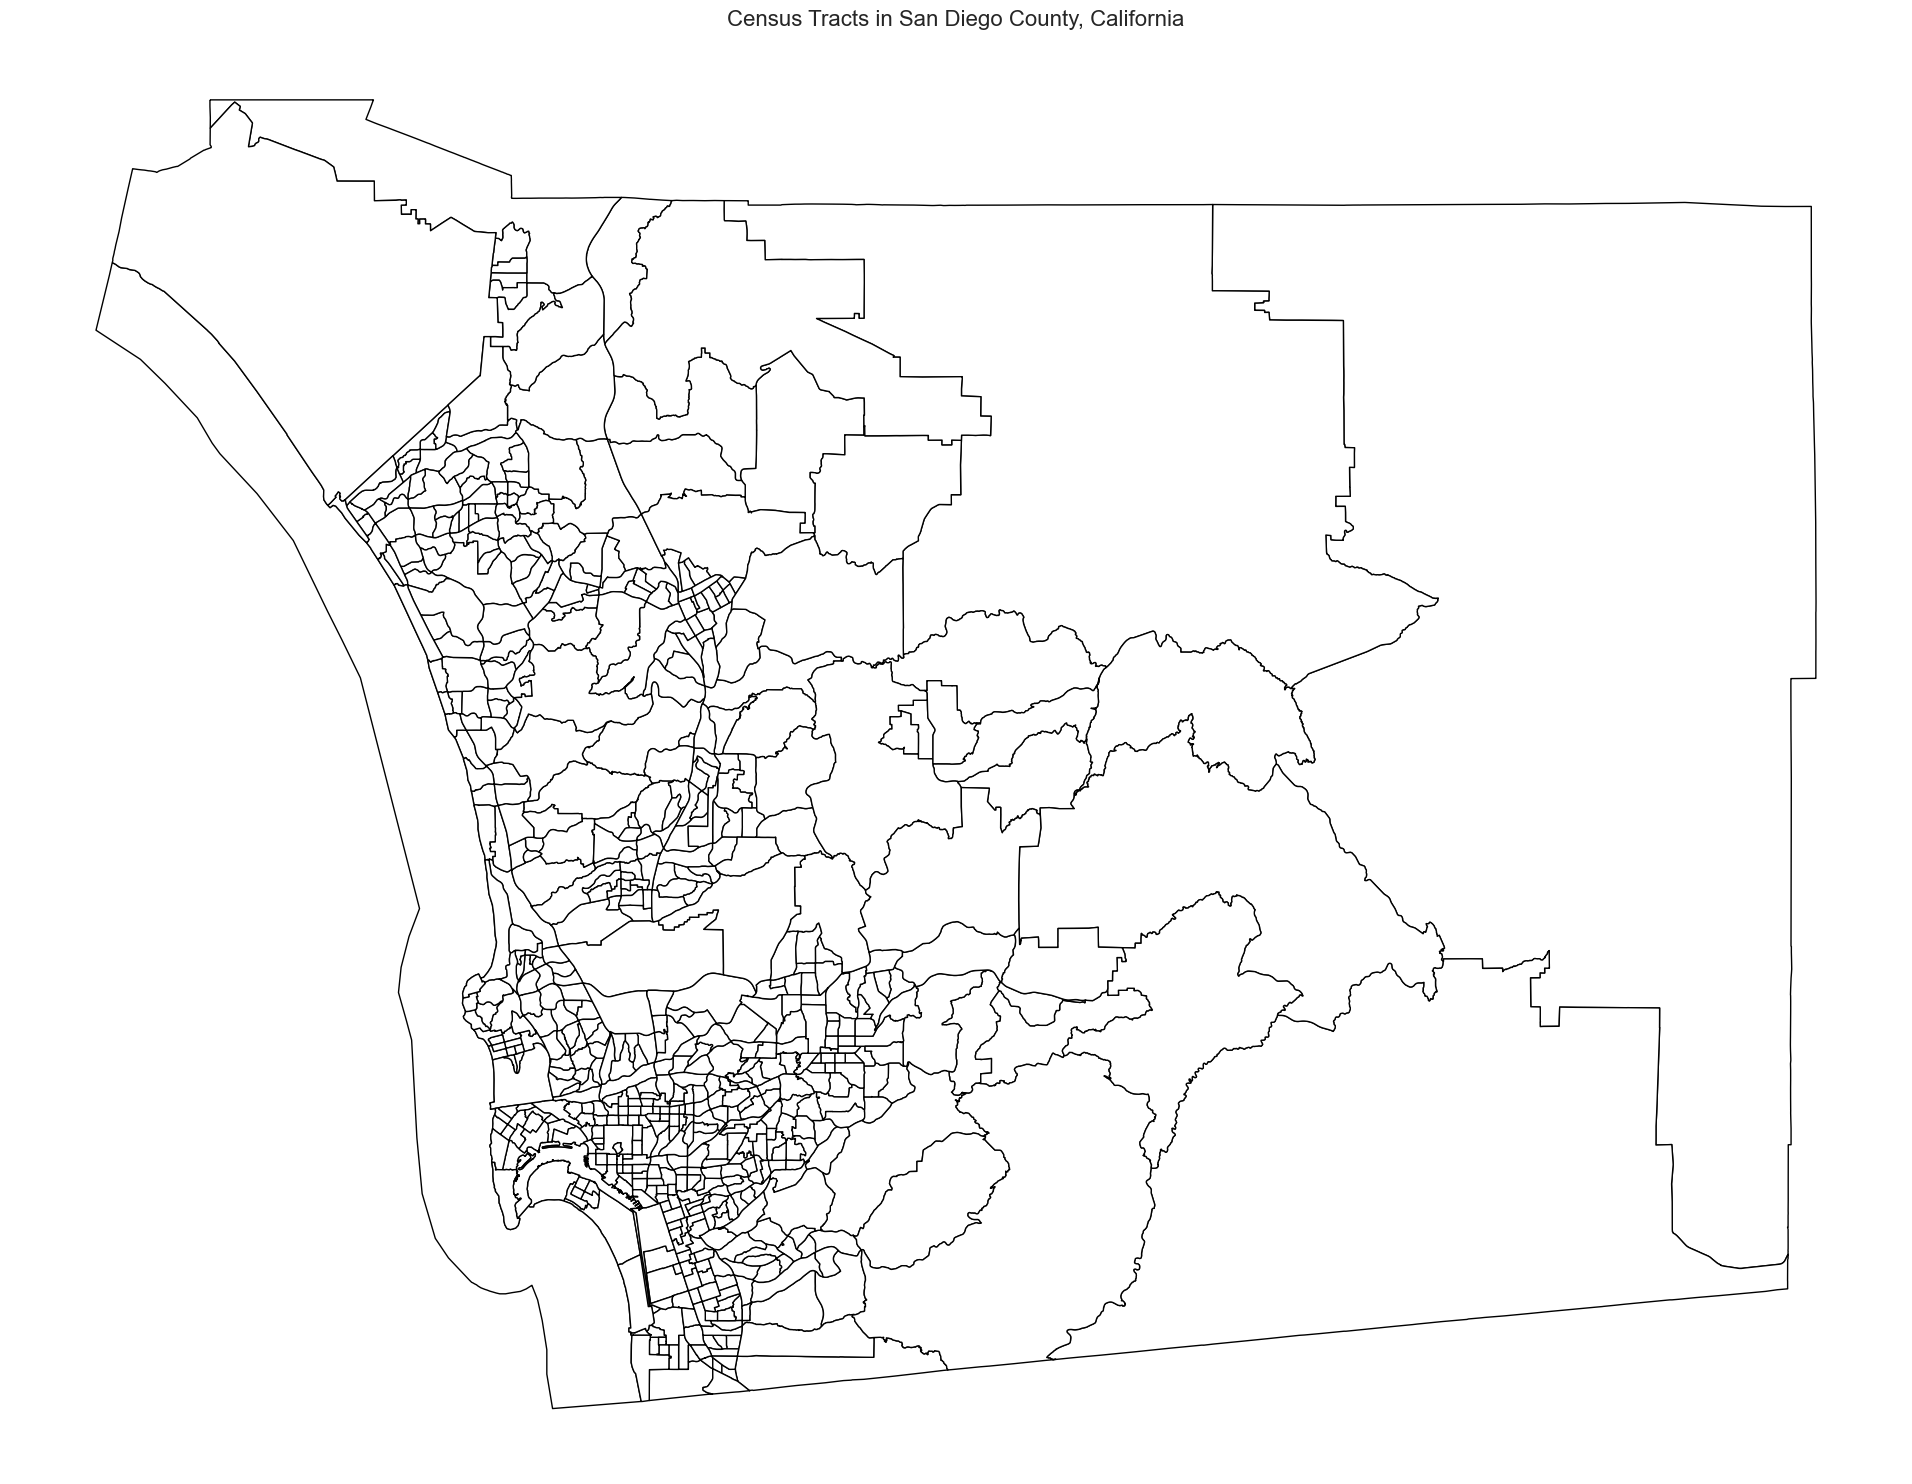

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

# Assuming your DataFrame is called 'df'

# Convert the 'geometry' column from string to Shapely geometry objects
df['geometry'] = df['geometry'].apply(wkt.loads)

# Now create the GeoDataFrame
gdfsd = gpd.GeoDataFrame(df, geometry='geometry')

# Ensure the CRS is set (EPSG:3857 based on the coordinates in the example)
gdfsd.set_crs(epsg=3857, inplace=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the GeoDataFrame
gdfsd.plot(ax=ax, color='white', edgecolor='black')

# Add a title
plt.title('Census Tracts in San Diego County, California', fontsize=16)

# Remove axis
ax.axis('off')

plt.tight_layout()
plt.show()


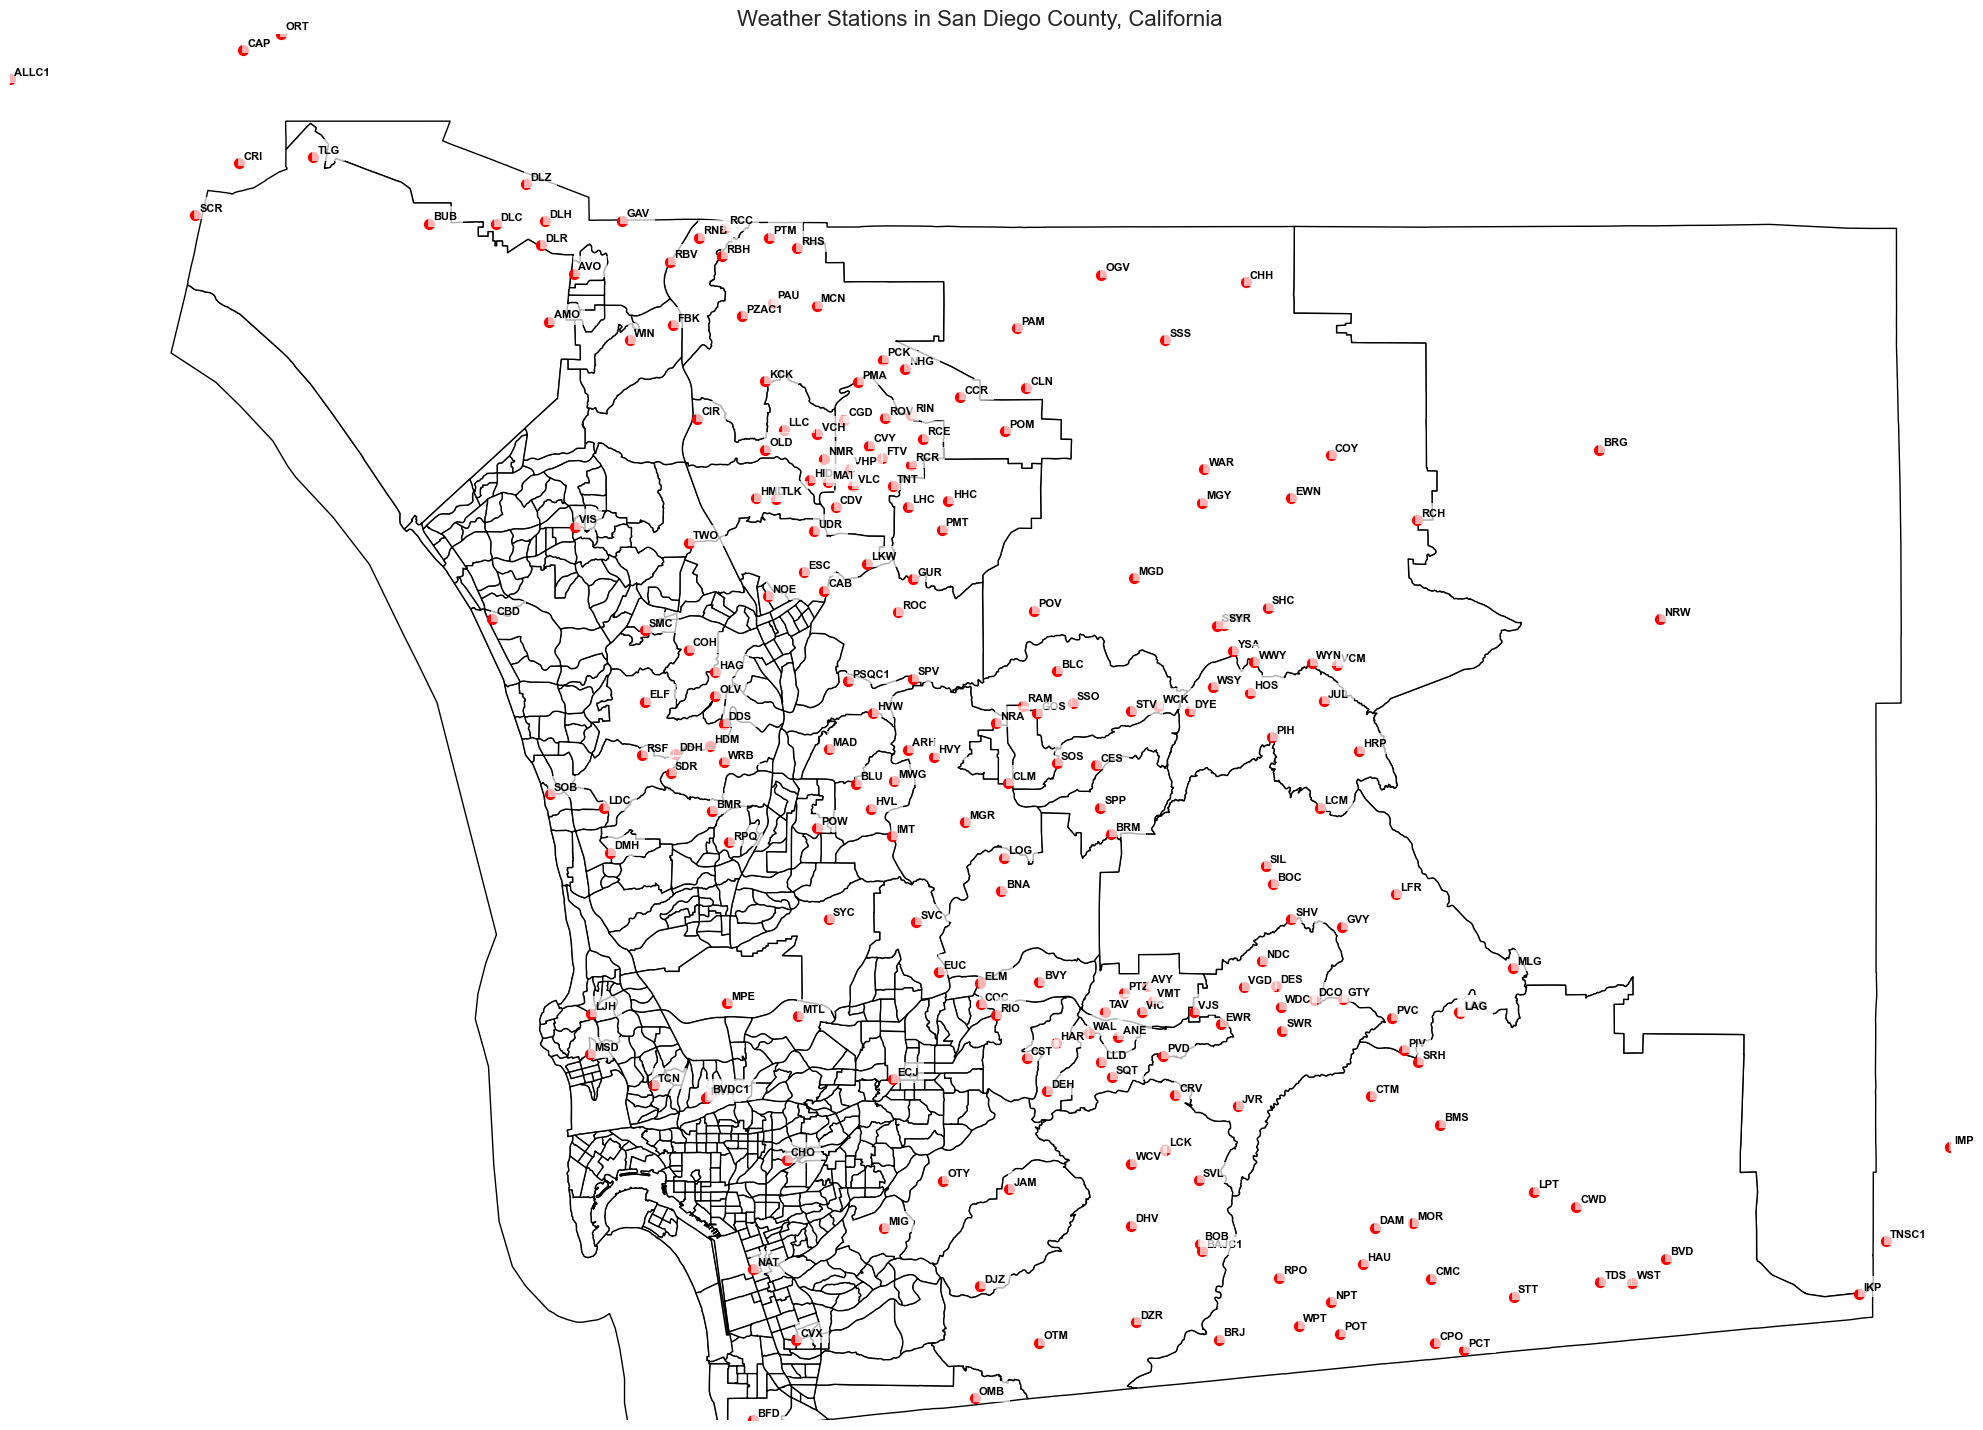

In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

# Assuming your San Diego DataFrame is called 'df' and weather station DataFrame is called 'gdf'


# Ensure the CRS is set (EPSG:3857 based on the coordinates in the example)
gdfsd.set_crs(epsg=3857, inplace=True)

# Ensure the weather station GeoDataFrame (gdf) has the same CRS
gdf = gdf.to_crs(epsg=3857)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the San Diego GeoDataFrame
gdfsd.plot(ax=ax, color='white', edgecolor='black')

# Plot the weather station points on top
gdf.plot(ax=ax, color='red', markersize=50, zorder=5)

# Add labels for each weather station
for idx, row in gdf.iterrows():
    plt.annotate(row['weatherstationcode'], (row.geometry.x, row.geometry.y),
                 xytext=(3, 3), textcoords="offset points",
                 fontsize=8, color='black', fontweight='bold',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7),
                 zorder=6)

# Add a title
plt.title('Weather Stations in San Diego County, California', fontsize=16)

# Remove axis
ax.axis('off')

# Adjust the plot extent to focus on the area where stations are located
margin = 0.1  # You can adjust this value
ax.set_xlim(gdf.total_bounds[0] - margin, gdf.total_bounds[2] + margin)
ax.set_ylim(gdf.total_bounds[1] - margin, gdf.total_bounds[3] + margin)

plt.tight_layout()
plt.show()


1) Calculating PSPS Probability for each Weather Station 
2) Visualizing Weather Station wind speed distributions against its wind speed threshold, and displaying its calculated PSPS Probability

In [30]:
merged_df.columns

Index(['date', 'wind_speed', 'station', 'snapshot_date_x', 'objectid',
       'weatherstationcode', 'weatherstationname', 'scadartuid', 'structureid',
       'nwszone', 'district', 'thomasbrospagegrid', 'constructionstatus',
       'creationuser', 'datecreated', 'datemodified', 'lastuser',
       'structureguid', 'symbolrotation', 'latitude', 'longitude', 'elevation',
       'twinguid', 'hftd', 'zone1idc', 'hftdidc', 'gdb_geomattr_data',
       'globalid', 'shape', 'shape_srid', 'snapshot_date_y', 'vri', 'alert'],
      dtype='object')

In [31]:
result = (
    merged_df.assign(exceeds_alert=lambda x: x['wind_speed'] > x['alert'])  # Create a boolean column
      .groupby('weatherstationname')
      .agg(total_records=('exceeds_alert', 'size'),  # Total records per station
           exceeds_count=('exceeds_alert', 'sum'))   # Count where wind_speed > alert
      .assign(percentage_of_PSIP_shutdown=lambda  x: (x['exceeds_count'] / x['total_records']) * 100)
      [['percentage_of_PSIP_shutdown']]  # Select only the relevant column
)

result.shape

(215, 1)

In [37]:
result.sort_values(by = ['percentage_of_PSIP_shutdown'],ascending = False)

percentage_of_PSIP_shutdown
weatherstationname                              
Sill Hill                              84.357542
Crestwood                              43.575419
Shockey Truck Trail                    42.458101
HELLHOLE CANYON                        40.223464
Boulder Creek                          37.988827
...                                          ...
San Marcos                              0.000000
Caballo Park                            0.000000
Circle R                                0.000000
Chula Vista                             0.000000
De Luz Heights                          0.000000

[215 rows x 1 columns]

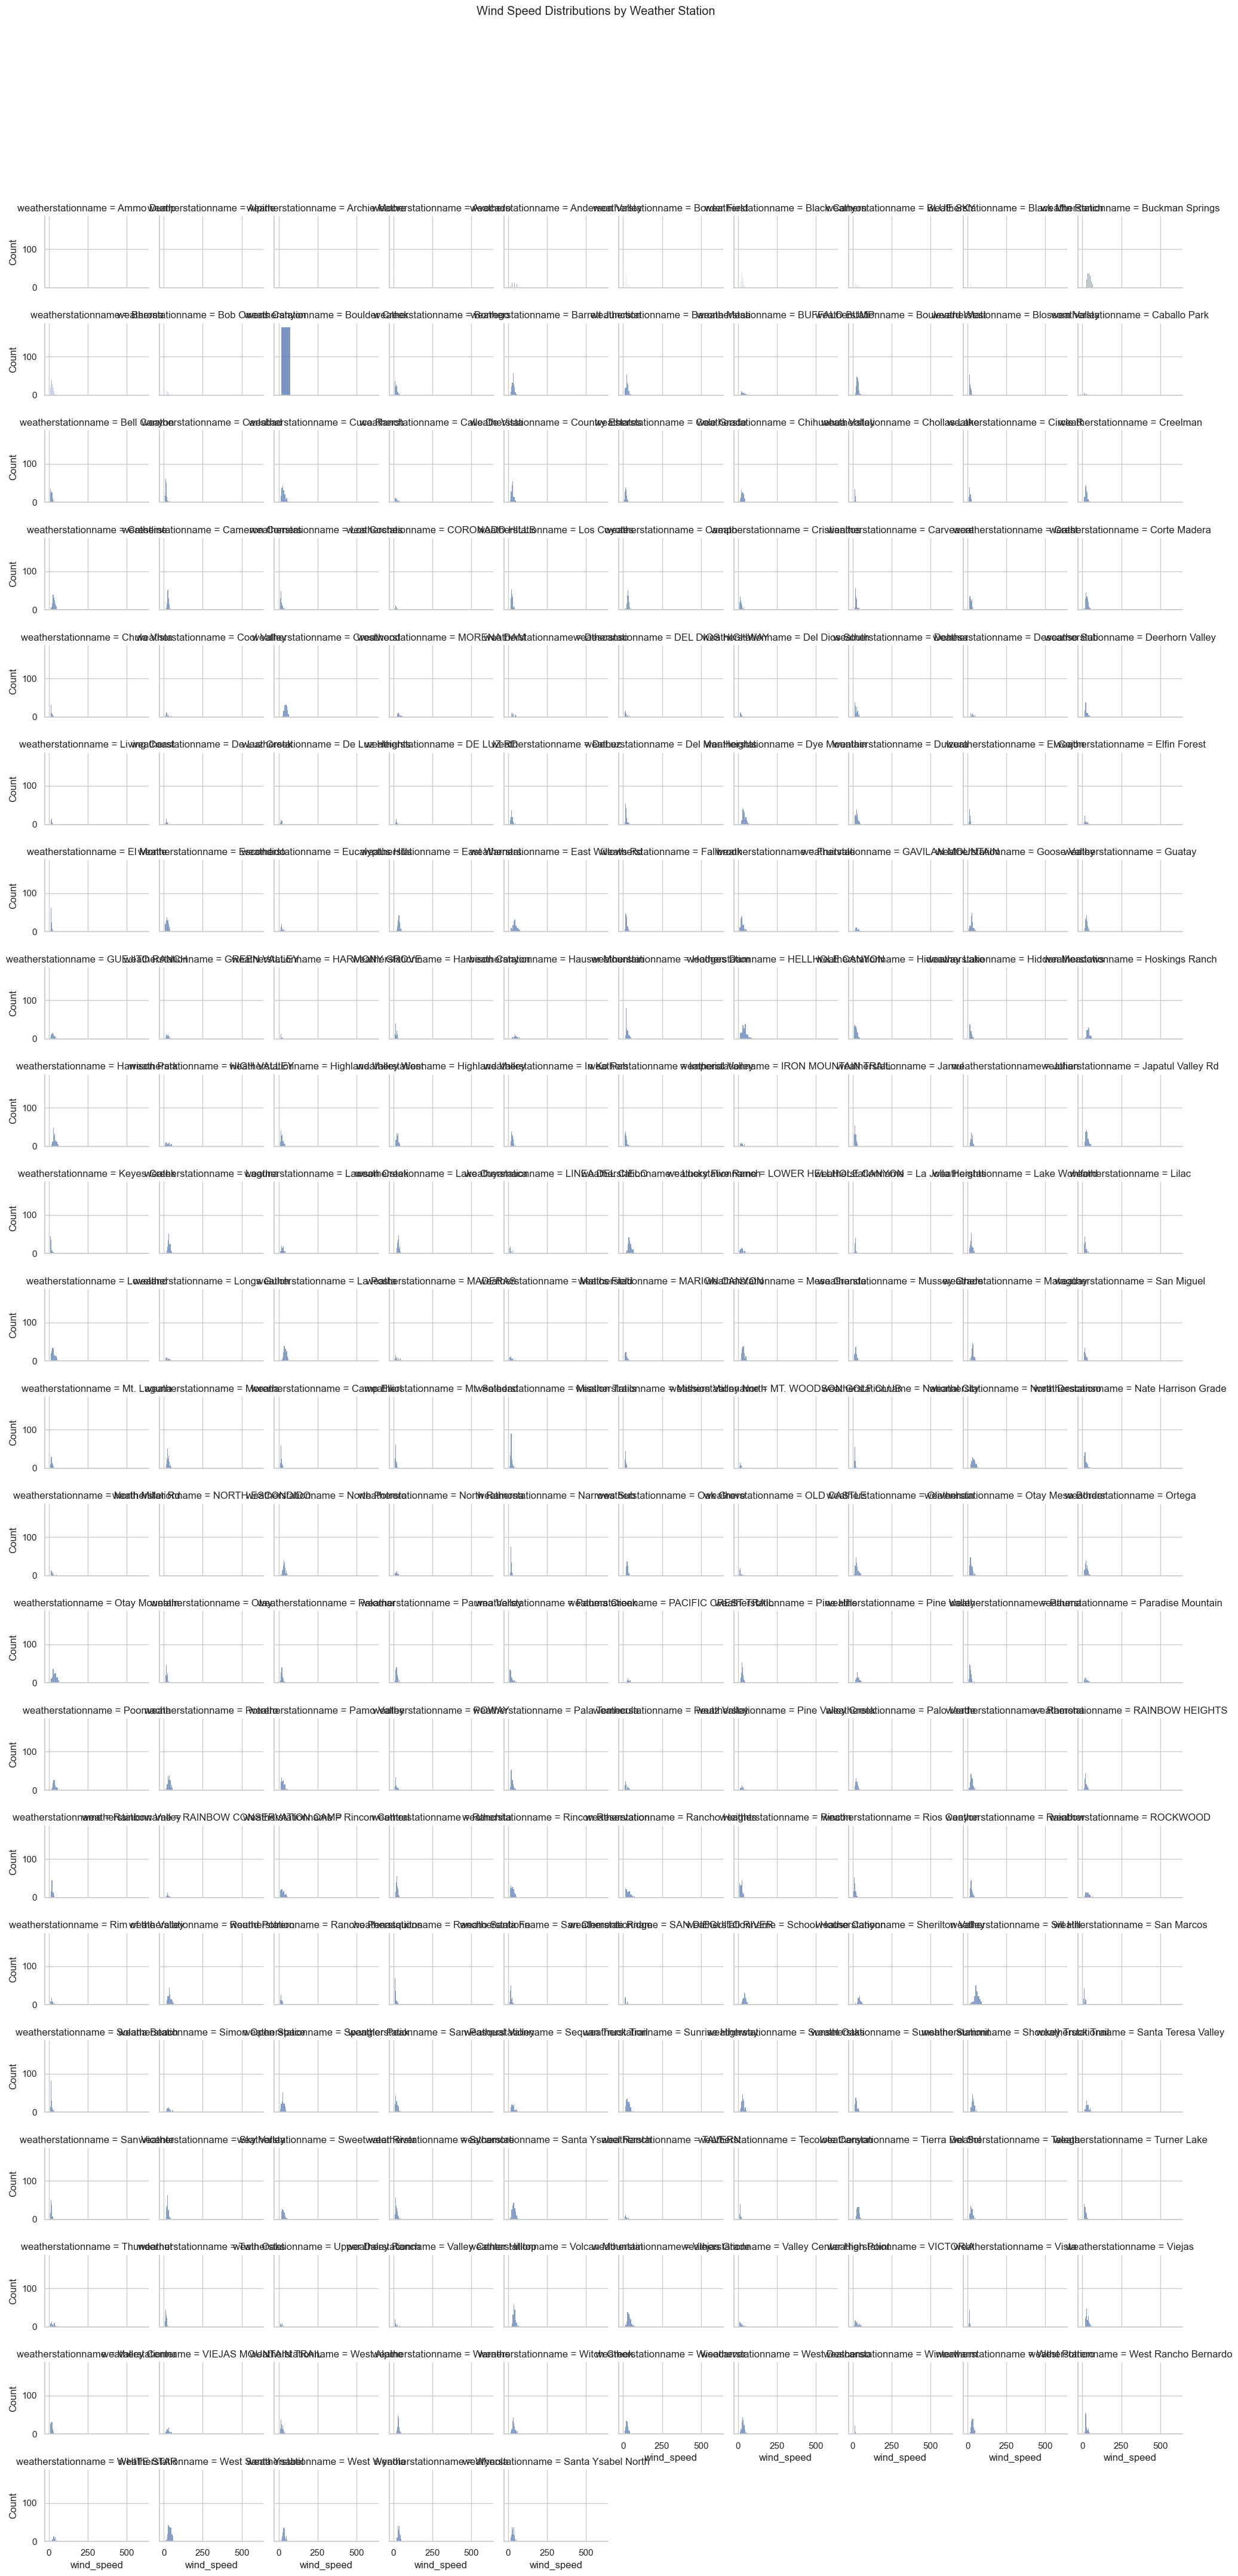

In [38]:
g = sns.FacetGrid(merged_df, col='weatherstationname', col_wrap=10, height=2)
g.map(sns.histplot, 'wind_speed', bins=10)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Wind Speed Distributions by Weather Station')
plt.show()

In [39]:
merged_df.groupby('weatherstationname').count()['wind_speed'].sort_values(ascending=True).tail(75)

weatherstationname
Twin Oaks               179
Round Potrero           179
Santa Ysabel North      179
Rancho Santa Fe         179
Santa Ysabel Ranch      179
                       ... 
Hodges Dam              179
Highland Valley West    179
Highland Valley         179
Loveland                179
Mataguay                179
Name: wind_speed, Length: 75, dtype: int64

In [40]:
overall_psip_avg = result['percentage_of_PSIP_shutdown'].mean()
overall_psip_avg

7.046901390152007

In [41]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


In [42]:
fig = px.histogram(
    merged_df,
    x='wind_speed',
    color='weatherstationname',
    title='Wind Speed Distribution by Weather Station',
    labels={'wind_speed': 'Wind Speed'},
    opacity=0.7,
    marginal='rug'  # Add a rug plot on the axes
)

C:\Users\William\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [43]:
fig.add_shape(
    type="line",
    x0=merged_df['wind_speed'].min(), x1=merged_df['wind_speed'].max(),
    y0=overall_psip_avg, y1=overall_psip_avg,
    line=dict(color="Red", width=2, dash="dash"),
)

fig.add_annotation(
    x=merged_df['wind_speed'].max(),
    y=overall_psip_avg,
    text=f"Overall PSIP Shutdown % Average: {overall_psip_avg:.2f}",
    showarrow=False,
    yshift=10
)

# Update layout for interactivity and aesthetics
fig.update_layout(
    hovermode='closest',
    xaxis_title='Wind Speed',
    yaxis_title='Count',
    barmode='overlay'
)

# Show figure
fig.show()